# Credit Card Fraud Detection

According to an article by [CNBC](https://www.cnbc.com/2021/01/27/credit-card-fraud-is-on-the-rise-due-to-covid-pandemic.html), the year 2019 witnessed a total of $28.65 billion worth of loss over payment card frauds across the globe. While we have much better and advanced modes of payment of money over the course of technological advancements, credit card frauds are still a prevelant problem today faced by millions of people on a regular basis. Hence, in this project we will try to spot a potential fraud tranaction so that the customers cannot bill for products they haven't purchased. Our aim will be to create a classifier that indicates whether a requested transaction is a fraud.

Here are some of the Python libraries used in this project:

- Pandas: You can explore more about this library [here](https://pandas.pydata.org/)
- Seaborn: You can explore more about this library [here](https://seaborn.pydata.org/)
- Matplotlib: You can explore more about this library [here](https://matplotlib.org/)
- NumPy: You can explore more about this library [here](https://numpy.org/)

## Downloading the Dataset

We will download our dataset from Kaggle, where we can find a lot of interesting datasets online. There are several options for getting the dataset into Jupyter:

>- Download the CSV manually and upload it via Jupyter's GUI
>- Use the urlretrieve function from the urllib.request to download CSV files from a raw URL
>- Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for
direct download.

We'll use the opendatasets helper library to download the files.

In [1]:
!pip install opendatasets --upgrade --quiet

You are using pip version 19.0.3, however version 21.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
url = 'https://www.kaggle.com/mlg-ulb/creditcardfraud'

In [3]:
import opendatasets as od
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hemanyaarora
Your Kaggle Key: ········


  2%|█▏                                                                           | 1.00M/66.0M [00:00<00:10, 6.58MB/s]

100%|█████████████████████████████████████████████████████████████████████████████| 66.0M/66.0M [00:11<00:00, 6.10MB/s]


In [4]:
data_dir = './creditcardfraud'

In [5]:
import os
os.listdir(data_dir)

['creditcard.csv']

In [6]:
project_name = 'credit-card-fraud-detection'

## Data Preparation and Cleaning

In order to make better predictions for our data, we will clean and parse our data in order to see if there are any unintentional errors left. For that we will import certain Python libraries necessary and optimal for working with our data.

In [52]:
import pandas as pd
import numpy as np
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's import our dataset into a pandas dataframe.

In [8]:
credit_fraud_df = pd.read_csv('./creditcardfraud/creditcard.csv')

In [9]:
credit_fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
credit_fraud_df.shape

(284807, 31)

Here we see that our data has 284807 rows and 31 columns. Let's see what do columns constitute in our data.

In [11]:
credit_fraud_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Here we see that only readable columns that are of importance to us are **Time**, **Amount**, and **Class**. Here the column **Class** differentiates between genuine and fraud transactions.

Let's see if there are any Null values in any of the columns.

In [12]:
credit_fraud_df.isnull().values.any()

False

Here, we see that our dataset has no null values.

Let's move forward and see and find more about the **Amount** column.

In [13]:
credit_fraud_df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Let's move forward and compare the statistics of fraud and genuine transactions.

In [14]:
fraud = len(credit_fraud_df[credit_fraud_df.Class == 1])
non_fraud = len(credit_fraud_df[credit_fraud_df.Class == 0])
perc = (fraud/(non_fraud+fraud)) * 100

print('Total number of Fraud Transactions: ', fraud)
print('Total number of Genuine Transactions: ', non_fraud)
print('Total percentage  of Fraud Transactions: {:.2f}'.format(perc))

Total number of Fraud Transactions:  492
Total number of Genuine Transactions:  284315
Total percentage  of Fraud Transactions: 0.17


Here we see that there are only 0.17 percent of fraud transactions which makes our data highly unbalanced.

Let's plot this information to put things into perspective.

In [15]:
class_df = credit_fraud_df.Class.value_counts()
class_df

0    284315
1       492
Name: Class, dtype: int64

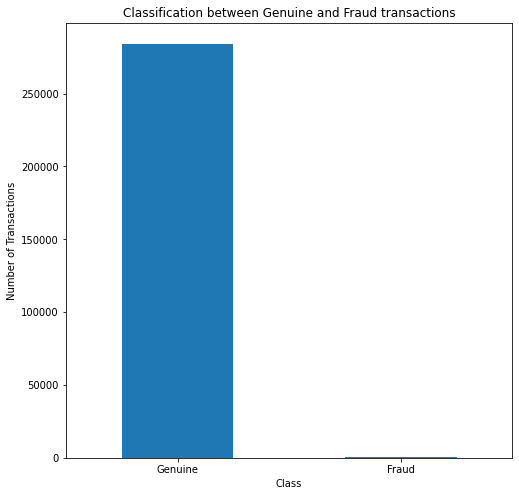

In [16]:
plt.figure(figsize=(8, 8))
labels = ["Genuine", "Fraud"]
class_df.plot(kind = 'bar')
plt.xticks(range(2), labels, rotation = 360);
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Classification between Genuine and Fraud transactions')
plt.show()

Here we see that there is a vast difference between both the number of transactions, which is not good since we have to build a training set for our classifier.

Therefore, we will perform data normalization in order to normalize the range of the **'Class'** variable for our dataset. For that, we will drop the **'Amount'** columns and add a new columns with the normalized values.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
credit_fraud_df.NormalizedAmount = scaler.fit_transform(credit_fraud_df.Amount.values.reshape(-1, 1))

X = credit_fraud_df.drop(["Class"], axis = 1)
Y = credit_fraud_df.Class

c:\users\heman\opencv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Now we will split our data into 70-30.

In [19]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print("Shape of train_X:", train_X.shape)
print("Shape of test_X:", test_X.shape)

Shape of train_X: (199364, 30)
Shape of test_X: (85443, 30)


## Applying Machine Learning Algorithms to our dataset

 From the dataset, it is obvious that we are facing a binary classification problem. Since there can be a variety of algorithms which can be implemented for our dataset, we will implement Logistic Regression classification model.

In [20]:
from sklearn.linear_model import LogisticRegression

In [46]:
logistic_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

Now, let's train and evaluate our model.

In [47]:
logistic_reg.fit(train_X, train_Y)
predictions_dt = logistic_reg.predict(test_X)
logistic_reg_score = logistic_reg.score(test_X, test_Y)*100
logistic_reg_score

99.92275552122467

Here we see that our Logistic Regression classifer delivers an accuracy of 99.923% for our test set data.

Let's make a function which displays the statistics for our classifier like: accuracy, precision, recall, and f1-score.

In [49]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

Now let's visualize a confusion matrix and the evaluation metrics for our Logistic Regression model.

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Logistic Regression Confusion Matrix")
print(confusion_matrix_dt)
arr = np.array(confusion_matrix_dt)

Confusion Matrix - Logistic Regression
[[85268    39]
 [   41    95]]


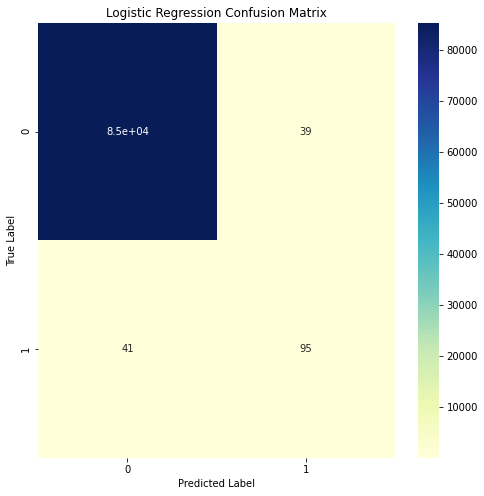

In [45]:
plt.figure(figsize = (8, 8))
sns.heatmap(confusion_matrix_dt, annot = arr, cmap="YlGnBu")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label");
plt.ylabel("True Label");

In [50]:
print("Total evaluations of Logistic Regression Model")
metrics(test_Y, predictions_dt.round())

Total evaluations of Logistic Regression Model
Accuracy: 0.99923
Precision: 0.86458
Recall: 0.61029
F1-score: 0.71552


Now, as we can see that our Logistic Regression model delivers a great accuracy rate, still our dataset suffers from class imbalance since only 0.17% of the transactions are fraud and around 99% of the transactions are genuine. In this case, our model will lay higher importance to the genuine transactions since there is more data about them in order to obtain more accuracy.  

Hence, here we will use the technique of **Oversampling** the minortiy class which in this case, will double the examples in minority class even though these examples contribute no new data to the model. In the end, new examples will be generated by replicating the existing ones. For this, we will use the SMOTE method of data augmentation for the minority class.

In [54]:
from imblearn.over_sampling import SMOTE

In [84]:
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X:", X_resampled.shape)
print("Resampled shape of Y:", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)
(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X: (568630, 30)
Resampled shape of Y: (568630,)
Counter({0: 284315, 1: 284315})


Now, we will apply our Logistic Regression algorithm to our resampled data.

In [100]:
lr_resampled = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_resampled.fit(train_X, train_Y)

predictions_resampled = lr_resampled.predict(test_X)
logistic_regression_score_resampled = lr_resampled.score(test_X, test_Y)*100

Now, let's visualize the new predictions of our model and plot the confusion matrix.

In [101]:
cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
print("Logistic Regression Confusion Matrix (Oversampled)")
arrx = np.array(cm_resampled)
print(cm_resampled)

Logistic Regression Confusion Matrix (Oversampled)
[[83908  1241]
 [ 2939 82501]]


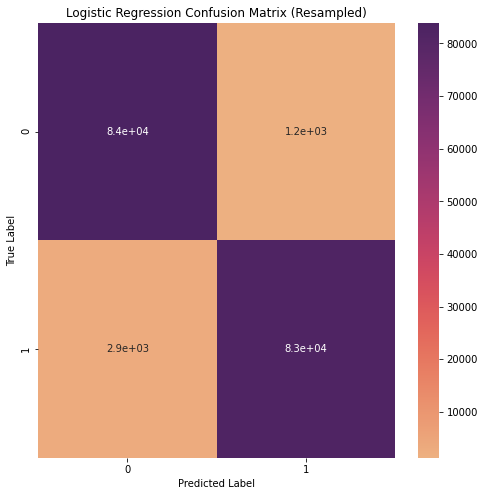

In [102]:
plt.figure(figsize = (8, 8))
sns.heatmap(cm_resampled, annot = arrx, cmap="flare")
plt.title("Logistic Regression Confusion Matrix (Resampled)")
plt.xlabel("Predicted Label");
plt.ylabel("True Label");

In [103]:
print("Evaluation of Logistic Regression Model")
metrics(test_Y, predictions_resampled.round())

Evaluation of Logistic Regression Model
Accuracy: 0.97550
Precision: 0.98518
Recall: 0.96560
F1-score: 0.97529


From this, it is clearly evident that our model performed much better and is well rounded than our previous Logistic regression model without oversampling.

## Inferences and Conclusion

In this python project, we built a binary classifier using the Logistic Regression algorithm to predict credit card fraud transactions. Through this project, we understood and applied techniques to address the class imbalance issues as well and achieved an accuracy of around 97.5%.

## References and Future Work

Here are some of the things which can be done and performed more in this project:
- Building a Random Tree Classifier Model
- Building a Decision Tree Classifier Model
- Building a KNN Classifier Model
- Building a SVM Classifier Model

And comparing which machine learning algorithm delivers the best results with respect to accuracy.